# Audio

Audio objects within *yuntu* are wrappers of distinct methods that are useful for data transformation and sampling. These utilities include transformations such as spectrogram calculations, data slicing by time/frequency geometries as well as plotting functions. Each *Audio* instance can hold annotations and metadata that may be retrieved during processing and the actual array of data is only invoqued when required to keep a minimal memmory footprint.

In [1]:
import os
import pandas as pd
from yuntu import Audio

TEST_DATA_DIR = '../yuntu/tests/test_data'

In order to create an *Audio* instance, one only needs to specify a *path*, but extra information that is needed for correct frequency scaling, such as time expansion, can also be specified to get the expected behaviour in non standard situations. This is specially useful for historical ultrasonic data that is frequently expanded by detectors.

In [2]:
path = os.path.join(TEST_DATA_DIR, '20210804_055000.WAV')
audio = Audio(path=path, timeexp=1.0)

The actual data is held as a numpy array within the *array* property of any *Audio* instance but this class has several numpy hooks that allow the application of numpy methods directly.

In [3]:
import numpy as np

print(audio.array)
print(np.amax(audio))
print(audio**2)
print(audio[0:1000])

[ 0.0166626   0.00244141 -0.00204468 ...  0.01220703 -0.00183105
 -0.00558472]
0.13238525
[2.7764216e-04 5.9604645e-06 4.1807070e-06 ... 1.4901161e-04 3.3527613e-06
 3.1189062e-05]
[ 1.66625977e-02  2.44140625e-03 -2.04467773e-03 -1.52587891e-03
  2.19726562e-03 -1.17187500e-02 -7.32421875e-03  5.73730469e-03
 -3.78417969e-03  6.01196289e-03  2.42309570e-02 -1.03759766e-02
  8.39233398e-03  1.89208984e-03 -1.14135742e-02 -6.59179688e-03
  2.71606445e-03  5.43212891e-03 -1.28173828e-02  7.04956055e-03
 -2.50244141e-03 -9.79614258e-03  9.03320312e-03 -1.43432617e-03
  3.57055664e-03 -4.69970703e-03  2.25830078e-03  1.49536133e-03
 -5.03540039e-03 -4.76074219e-03  5.15747070e-03 -6.95800781e-03
  1.12304688e-02 -1.46484375e-03  6.50024414e-03  4.15039062e-03
 -4.11987305e-03 -3.11279297e-03 -1.83105469e-03 -6.92749023e-03
  2.19726562e-03  8.08715820e-03  6.65283203e-03 -2.50244141e-03
 -8.23974609e-04 -1.67846680e-03 -2.77709961e-03 -8.81958008e-03
  5.98144531e-03 -6.10351562e-05  3.204

The *plot* method can take a specific axis as well as matplotlib specific arguments.

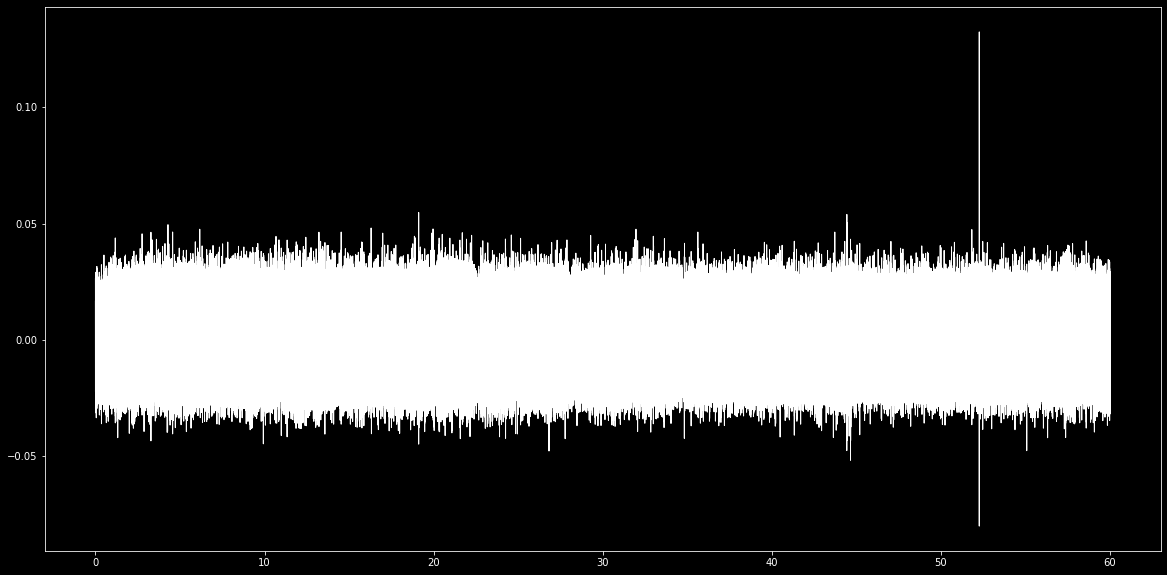

In [4]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,10))
audio.plot(ax=ax, color="white")

The *listen* method of any *Audio* object can be used to play the contents of the object in jupyter. This method accepts an optional *speed* argument to slow down or speed up the signal, which can be useful for ultrasonic data.

In [5]:
audio.listen(speed=0.5)

Audio objects can also be created passing a 1d numpy array in the *array* argument as well as a samplerate or duration.

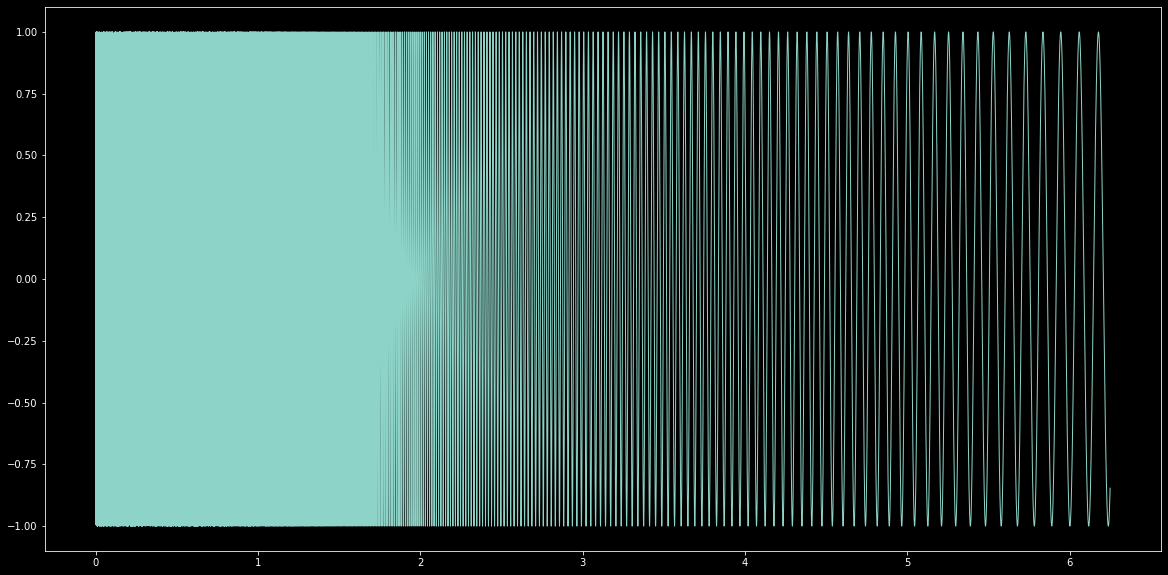

In [6]:
array = np.sin(100000/np.arange(0.1,100*np.pi,100*np.pi/100000))
dummy = Audio(array=array, samplerate=16000)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,10))
dummy.plot(ax=ax)

In [7]:
dummy.listen()

The *to_dict* method generates a dictionary abstraction of the *Audio* object that can be used to recreate objects using the class method *from_dict*. This can be usefull for example generation as each object definition can be stored as a JSON file (provided that the data path is accesible).

In [8]:
from pprint import pprint

audio_dict = audio.to_dict()
pprint(audio_dict)

{'annotations': [],
 'id': '20210804_055000.WAV',
 'media_info': {'duration': 60.0,
                'filesize': 5760488,
                'length': 2880000,
                'nchannels': 1,
                'samplerate': 48000,
                'sampwidth': 2},
 'metadata': {},
 'path': '../yuntu/tests/test_data/20210804_055000.WAV',
 'time_axis': {'resolution': 48000},
 'timeexp': 1.0,
 'type': 'Audio',
 'window': {'end': 60.0, 'start': 0, 'type': 'TimeWindow'}}


In [9]:
Audio.from_dict(audio_dict)

Audio(path='../yuntu/tests/test_data/20210804_055000.WAV', duration=60.0, samplerate=48000)

The *cut* method with *start_time* and *end_time* arguments can produce time slices as new *Audio* objects with explicit relative time reference within the original data (notice *x* axis in the following plot). The resulting object is also lazy until data is required. Like any other *Audio* object, the *write* method can be used to persist the resulting clip into disk specifying a samplerate.

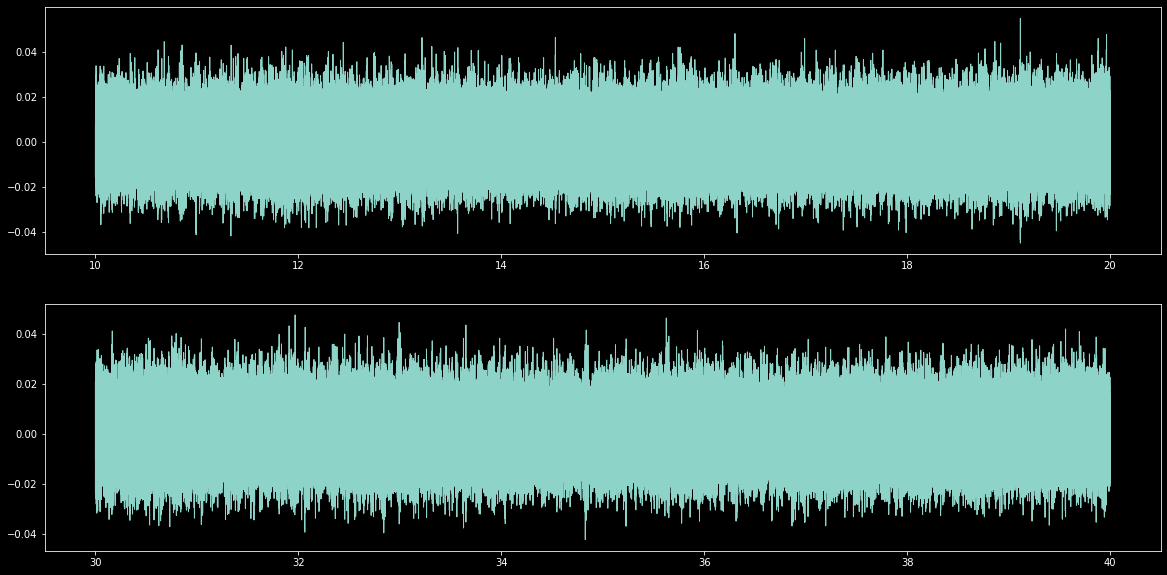

In [10]:
acut0 = audio.cut(start_time=10, end_time=20)
acut1 = audio.cut(start_time=30, end_time=40)

fig, ax = plt.subplots(2,1,figsize=(20,10))

acut0.plot(ax=ax[0])
acut1.plot(ax=ax[1])

In [11]:
acut0.write(path="/tmp/cut0.WAV", samplerate=audio.samplerate)

Using methods contained in the *features* attribute of each *Audio* object one can generate distinct transformations that are common for acoustic analyisis, such as spectrograms in distinct scales and zero crossing rate.

In [12]:
spec = audio.features.db_spectrogram()
zcr = audio.features.zcr()

These objects preserve time reference and, depending on the specific feature, can have new reference axis such as a frequency scale that can also be used to cut slices passing limits to the *cut* method. Plotting methods are also available for these objects and specific arguments for *pcolormesh* can be specified. When plotting several *yuntu* objects with the same time or frequency scale, *sharex* or *sharey*  can be used to align graphics.

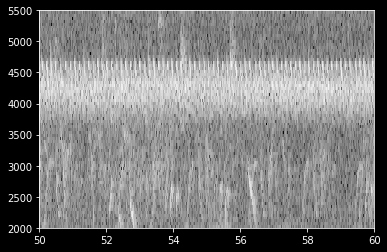

In [13]:
spec.cut(start_time=50, end_time=80, max_freq=5500, min_freq=2000).plot()

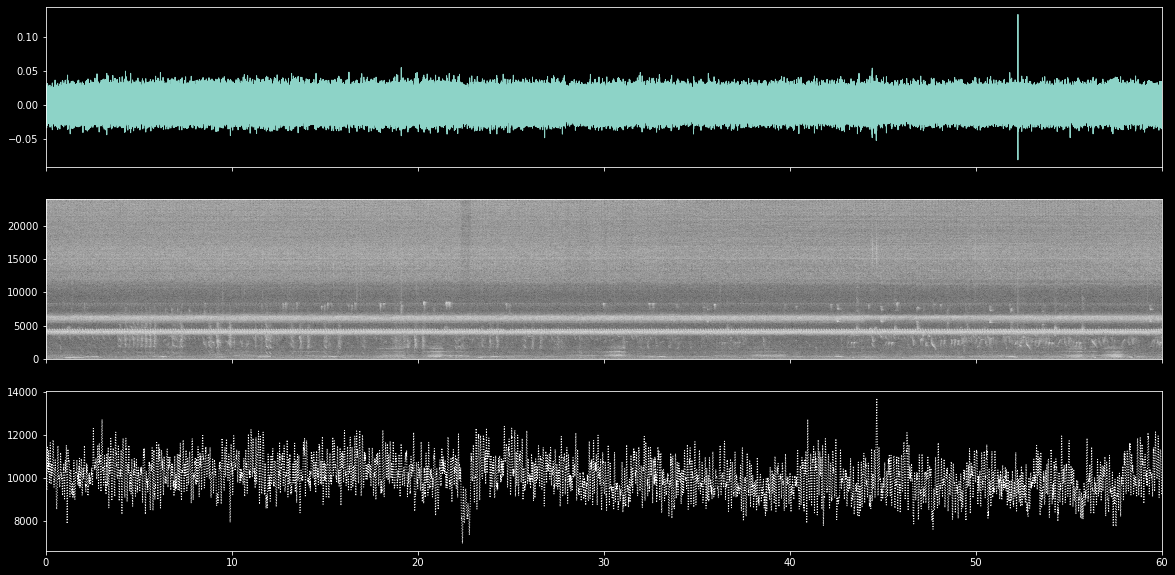

In [14]:
fig, ax = plt.subplots(3,1,figsize=(20,10), sharex=True)

audio.plot(ax=ax[0])
spec.plot(ax=ax[1], shading="gouraud")
zcr.plot(ax=ax[2], color="white")

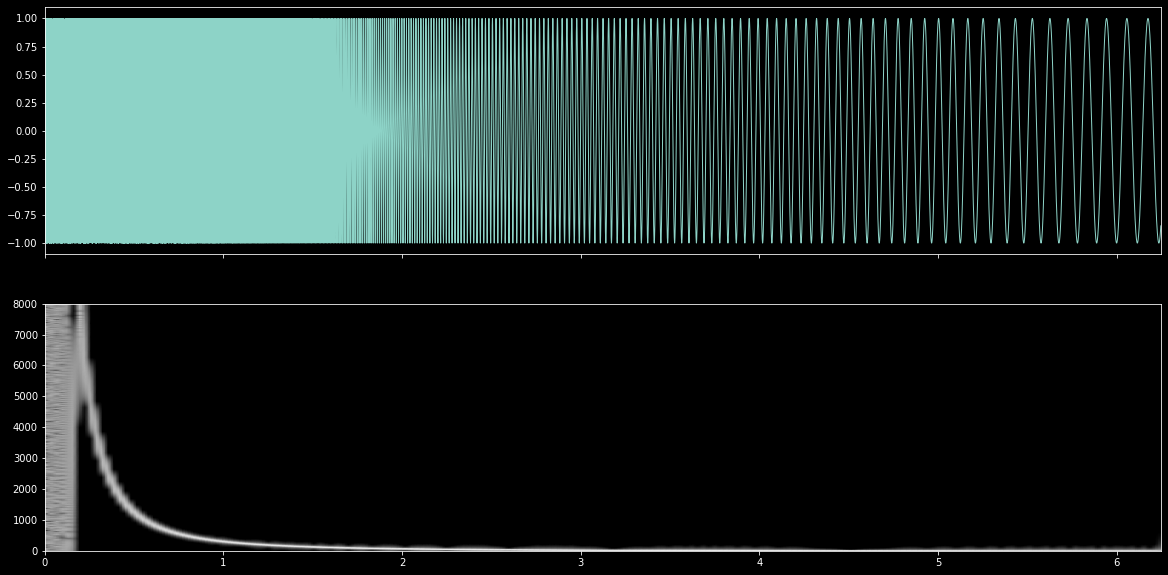

In [15]:
fig, ax = plt.subplots(2,1,figsize=(20,10), sharex=True)

dummy.plot(ax=ax[0])
dummy.features.db_spectrogram().plot(ax=ax[1], shading="gouraud")

## Audio dataframes

Loading *yuntu* enables pandas and dask dataframe accessors that allow the treatment of certain dataframe structures as object specifications. The *audio* accessor has built in methods for parsing each row as an audio object mimicking the behaviour of the *iloc* in pandas but aside from returning rows, it returns audio objects parsed from each row. The only requisite for a dataframe to be considered as an audio dataframe is a *path* column specifying the direction of each file, but the presence of additional information, such as an explicit time reference, unlocks specific methods.

In [16]:
paths = [os.path.join(TEST_DATA_DIR, f) for f in os.listdir(TEST_DATA_DIR) if os.path.isfile(os.path.join(TEST_DATA_DIR, f))]
recordings = pd.DataFrame({"path": paths})

In [17]:
recordings.audio

In [18]:
recordings.iloc[1:3]

path
1  ../yuntu/tests/test_data/20210804_063000.WAV
2  ../yuntu/tests/test_data/20210804_061000.WAV

In [19]:
recordings.audio[1:3]

[Audio(path='../yuntu/tests/test_data/20210804_063000.WAV', duration=60.0, samplerate=48000),
 Audio(path='../yuntu/tests/test_data/20210804_061000.WAV', duration=60.0, samplerate=48000)]

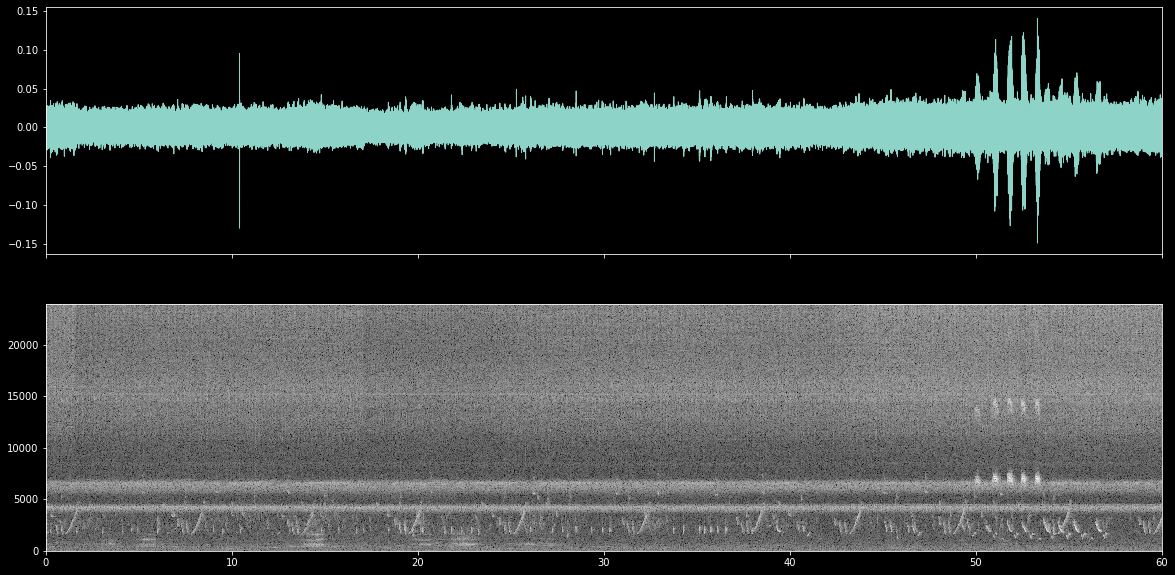

In [20]:
fig, ax = plt.subplots(2,1,figsize=(20,10), sharex=True)

recordings.audio[3].plot(ax=ax[0])
recordings.audio[3].features.db_spectrogram().plot(ax=ax[1])

The *audio* accessor has a special *apply* method that works much like a row-wise apply in pandas or dask but passes an *Audio* object buit on the fly in addition to the row itself. Applied methods should consider this argument in order to work. Notice the use of the context manager in the following example method. This pattern, available for some objects such as *Audio* and its features, ensures that any memory footprint of the object is not present outside the scope.

In [21]:
def channel_power(row, audio, channel_limits=(0,1000)):
    with audio.features.spectrogram().cut(min_freq=channel_limits[0], max_freq=channel_limits[1]) as spec:
        power = np.sum(spec**2)
    return power

In [22]:
for i in range(10):
    top = (i+1)*1000
    bottom= (i)*1000
    col_name = f"channel_{top}"
    recordings.loc[:, col_name] = recordings.audio.apply(channel_power, channel_limits=(bottom,top))

In [23]:
recordings

path  channel_1000  channel_2000  \
0  ../yuntu/tests/test_data/20210804_060000.WAV   2656.338379    997.900940   
1  ../yuntu/tests/test_data/20210804_063000.WAV   3701.056885   2802.545166   
2  ../yuntu/tests/test_data/20210804_061000.WAV   6607.604004   6885.891602   
3  ../yuntu/tests/test_data/20210804_062000.WAV   2363.651367   2869.737793   
4  ../yuntu/tests/test_data/20210804_055000.WAV   2972.820068    606.773682   

   channel_3000  channel_4000  channel_5000  channel_6000  channel_7000  \
0   4231.848633   4188.812012  16883.369141   2286.887451  18518.564453   
1   5979.632324   1968.115234  11789.882812    471.436157   5262.561523   
2   6996.436523   6622.311035  15531.317383   1237.643799  10230.802734   
3   7540.175781   2217.589600  10759.611328   1332.673950  14004.615234   
4   1277.700806   3498.197266  34517.167969   2079.255859  16437.673828   

   channel_8000  channel_9000  channel_10000  
0   4459.665039    341.869812     419.157257  
1   1615.340332    673.063965     377.303772  
2   8555.422852    617.762024     389.875092  
3   8402.020508    251.808701     260.075531  
4    396.026947    761.349121     244.749252

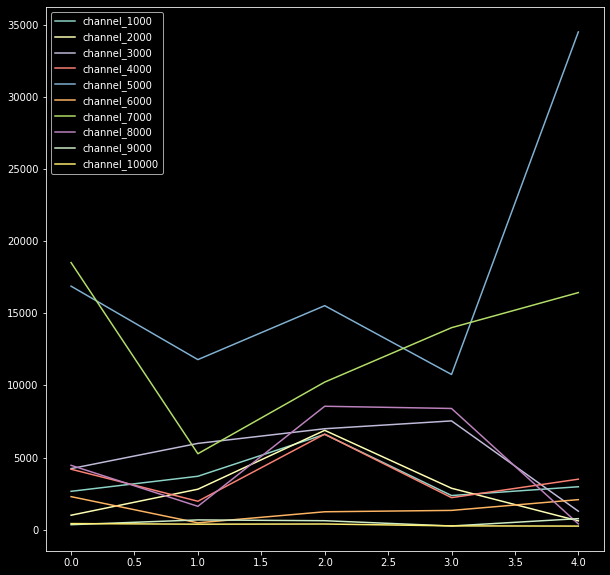

In [24]:
fig, ax = plt.subplots(figsize=(10,10), sharex=True)

recordings.plot(ax=ax)

Extra fields don't affect the interpretation of the audio structure so one can add any extra information that could be useful during computations.

In [25]:
recordings.audio

The *audio* accessor is most useful for projecting data from a *yuntu* *collection* but this will be treated elsewhere together with the demonstration of other methods available within this accessor that requiere further definition of columns. The complete list of interpretable columns for the *audio* accessor is shown bellow. There are other columns that can be used, such as *time_utc* column holding a datetime for soundscape generation, but this is subject to specification.

In [26]:
from yuntu.dataframe.audio import REQUIRED_AUDIO_COLUMNS, OPTIONAL_AUDIO_COLUMNS

print("Required columns: ", REQUIRED_AUDIO_COLUMNS)
print("Optional columns: ", OPTIONAL_AUDIO_COLUMNS)

Required columns:  ['path']
Optional columns:  ['samplerate', 'timeexp', 'duration', 'media_info', 'metadata', 'id']


The dask accessor is very much alike and behaves as expected. Column names and types are usually not infered properly by dask when using *apply* on a dask dataframe so it is recommended to pass a *meta* argument with this information. The following function computes entropy using channel total energy to get relative frequencies. It includes de computation of entropy based on previous calculations stored in the dataframe columns to show the usage of this information within an *audio* apply.

In [27]:
def get_entropy(row, audio, freq_bins=24):
    with audio.features.spectrogram() as spec:
        nfreqs = spec.shape.rows
        max_freq = audio.samplerate/2
        step = np.round(max_freq/freq_bins)
        channel_energy = np.array([np.sum(spec.cut(min_freq=i*step, max_freq=(i+1)*step)**2)
                                   for i in range(freq_bins)])
        p = channel_energy/np.sum(channel_energy)
        entropy = -np.sum(p*np.log(p))
        
        channel_energy_ref = np.array([row[c] for c in row.index if "channel" in c])
        p_ref = channel_energy_ref/np.sum(channel_energy_ref)
        
        entropy_ref = -np.sum(p_ref*np.log(p_ref))

    return pd.Series({"entropy": entropy, "entropy_ref": entropy_ref})

In [28]:
import time
import dask.dataframe as dd

recordings_dd = dd.from_pandas(recordings, npartitions=5)

In [29]:
recordings_dd

Dask DataFrame Structure:
                 path channel_1000 channel_2000 channel_3000 channel_4000 channel_5000 channel_6000 channel_7000 channel_8000 channel_9000 channel_10000
npartitions=4                                                                                                                                           
0              object      float64      float64      float64      float64      float64      float64      float64      float64      float64       float64
1                 ...          ...          ...          ...          ...          ...          ...          ...          ...          ...           ...
2                 ...          ...          ...          ...          ...          ...          ...          ...          ...          ...           ...
3                 ...          ...          ...          ...          ...          ...          ...          ...          ...          ...           ...
4                 ...          ...          ...          ...          ...          ...          ...          ...          ...          ...           ...
Dask Name: from_pandas, 4 tasks

In [30]:
entropy = recordings_dd.audio.apply(get_entropy, meta=[("entropy", np.dtype("float32")), ("entropy_ref", np.dtype("float32"))])

In [31]:
entropy

Dask DataFrame Structure:
               entropy entropy_ref
npartitions=4                     
0              float32     float32
1                  ...         ...
2                  ...         ...
3                  ...         ...
4                  ...         ...
Dask Name: apply, 8 tasks

In [32]:
start=time.time()
e = entropy.compute()
end=time.time()
print("Elapsed time: "+str(end-start)+"seconds")
e

Elapsed time: 1.6185240745544434seconds


entropy  entropy_ref
0  2.852108     1.746492
1  2.927782     1.888870
2  2.972813     2.014061
3  2.847013     1.869089
4  2.464833     1.329067

Dask *apply* computation time can be equal or slower than using pandas when the volume of data is low, depending as well on the type of cluster and partitioning scheme, so it makes more sense to use dask when working with large dataframes.

In [33]:
start=time.time()
e = recordings.audio.apply(get_entropy)
end=time.time()
print("Elapsed time: "+str(end-start)+"seconds")
e

Elapsed time: 1.6082799434661865seconds


entropy  entropy_ref
0  2.852108     1.746492
1  2.927782     1.888870
2  2.972813     2.014061
3  2.847013     1.869089
4  2.464833     1.329067

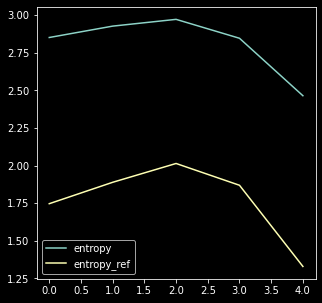

In [34]:
fig, ax = plt.subplots(figsize=(5,5), sharex=True)

e.plot(ax=ax)